## Bouton density

First, some packages needs to be imported.

In [20]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn
import json
from pathlib import Path

# package to work with the circuit
from bluepysnap import Circuit
from bluepysnap.bbp import Cell
import neurom as nm

Reading and preparing the data

In [21]:
circuit_path = '/home/tdelemon/1.Workdir/tests/mooc-106/circuit/circuit_config.json'
circuit = Circuit(circuit_path)
cells = circuit.nodes["hippocampus_neurons"]
conn = circuit.edges["hippocampus_neurons__hippocampus_neurons__chemical"]

In [22]:
print(circuit._config)

{'components': {'morphologies_dir': '/gpfs/bbp.cscs.ch/project/proj42/entities/morphologies/20180417/08_CloneMorphologies-h5v1', 'mechanisms_dir': '/home/tdelemon/1.Workdir/tests/mooc-106/circuit/mechanisms'}, 'networks': {'nodes': [{'nodes_file': '/home/tdelemon/1.Workdir/tests/mooc-106/circuit/nodes.sonata', 'node_types_file': None, 'node_sets_file': '/home/tdelemon/1.Workdir/tests/mooc-106/circuit/node_sets.json'}], 'edges': [{'edges_file': '/home/tdelemon/1.Workdir/tests/mooc-106/circuit/edges.sonata', 'edge_types_file': None}]}}


In [23]:
# !ls /home/data-bbp/20191017/entities/morphologies/20180417/ascii/

In [24]:
sample = 5000
mtypes = cells.property_values(Cell.MTYPE)

In [25]:
df = pd.DataFrame(index=mtypes, columns=['mean', 'std'])

In [26]:
def sample_bouton_density(circuit, sample, group=None, synapses_per_bouton=1.0):
    def _calc_bouton_density(gid, synapses_per_bouton):
        synapse_count = len(conn.efferent_edges(gid))
        axon_length = nm.get(
            'neurite_lengths', cells.morph.get(gid, False), neurite_type=nm.AXON
        )[0]
        return (1.0 * synapse_count / synapses_per_bouton) / axon_length

    gids = cells.ids(group)
    print(gids)
    if len(gids) > sample:
        gids = np.random.choice(gids, size=n, replace=False)
    return np.array([_calc_bouton_density(gid, synapses_per_bouton) for gid in gids])


for mtype in mtypes:
    data = sample_bouton_density(circuit, sample, group={Cell.MTYPE: mtype, Cell.REGION: {'$regex': 'mc2.*'}}, synapses_per_bouton=1.15) 
    df.loc[mtype]['mean'] = data.mean()
    df.loc[mtype]['std'] = data.std()

df.head()

[17196 17198 17201 17205 17211 17222 17238 17246 17253 17257 17301 17305
 17339 17358 17384 17386]
[16900 16904 16926 16928 16949 16962 16966 16967 16971 16983 16984 16986
 16997 16998 17007 17011 17015 17035 17036 17040 17058 17061 17062 17066
 17073 17074 17089 17092 17093 17099 17105 17116 17117 17120 17132 17137
 17140 17148 17155 17170 17173 17178 17179 17193]
[   44    49    59 ... 16876 16877 16895]
[17562 17575 17596 17600 17601 17602 17604 17605 17609 17614 17615 17617
 17626 17631 17635 17636 17638 17658 17663 17666 17669 17670 17673 17676
 17686 17695 17698 17703 17717 17742 17751 17779 17786 17791 17816 17820
 17844 17870 17872 17882 17907 17911 17916 17917 17943 17945 17957 17973
 17982 17984 17991 17997 18018]
[17398 17410 17415 17422 17434 17447]
[18152 18153 18154 18161 18162 18176]
[18052 18060 18067 18072 18076 18096 18108]
[17485 17496 17514 17515 17516 17529 17531 17534 17537 17546]
[]
[]
[18139 18148]


/home/tdelemon/.virtualenvs/mooc/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice.
/home/tdelemon/.virtualenvs/mooc/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tdelemon/.virtualenvs/mooc/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/tdelemon/.virtualenvs/mooc/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/tdelemon/.virtualenvs/mooc/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[21 24 25]


,mean,std
SP_CCKBC,0.277248,0.0235034
SP_PVBC,0.133202,0.014961
SP_PC,0.075241,0.03759
SP_Ivy,0.351666,0.0258634
SP_BS,0.166835,0.00500098


/home/tdelemon/.virtualenvs/mooc/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


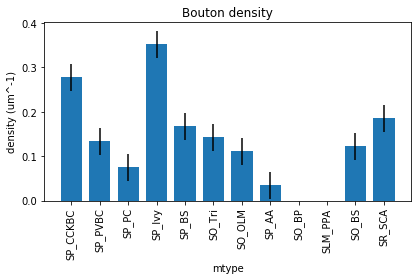

In [28]:
plt.close('all')

fig, ax = plt.subplots()

labels = mtypes
ind = np.arange(len(labels))
width = 0.75

s = ax.bar(ind, df['mean'], width, yerr=df.loc[mtype]['std'])

ax.set_xlabel('mtype')
ax.set_ylabel('density (um^-1)')
ax.set_title('Bouton density')
ax.set_xticks(ind)
ax.set_xticklabels(labels, rotation='vertical')

fig.tight_layout()

fig.show()

In [29]:
# reference biological dataset
bio_path = '/home/data-bbp/20191017/circuit/bioname/bouton_density_20190131.tsv'

In [21]:
data = pd.read_csv(bio_path, names=['mtype', 'bio_mean', 'bio_std'], skiprows=2, usecols=[0,1,2], delim_whitespace=True)
data.head()

,mtype,bio_mean,bio_std
0,SO_BS,0.2100,0.0
1,SO_BP,0.2480,0.0
2,SP_PC,0.1241,0.0
3,SO_Tri,0.2820,0.0
4,SP_PVBC,0.2260,0.0


In [22]:
selected = data['mtype'].values
data['mod_mean'] = df.loc[selected]['mean'].values
data['mod_std'] = df.loc[selected]['std'].values
data.head()

,mtype,bio_mean,bio_std,mod_mean,mod_std
0,SO_BS,0.2100,0.0,NaN,NaN
1,SO_BP,0.2480,0.0,NaN,NaN
2,SP_PC,0.1241,0.0,NaN,NaN
3,SO_Tri,0.2820,0.0,NaN,NaN
4,SP_PVBC,0.2260,0.0,NaN,NaN


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:30: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


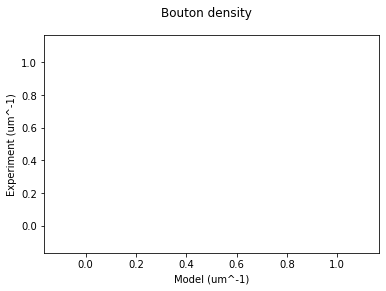

In [23]:
plt.close('all')

x = data['mod_mean'].values
y = data['bio_mean'].values
# remove nan value from the array
# l = np.linspace(0, max(x[~np.isnan(x)].max(), y.max()), 50)
l = np.linspace(0, max(x.max(), y.max()), 50)
fig, ax = plt.subplots()
fig.suptitle('Bouton density')
ax.plot(x, y, 'o')
ax.errorbar(x, y, xerr=data['mod_std'].values, yerr=data['bio_std'].values, fmt='o', ecolor='g', capthick=2)
ax.plot(l, l, 'k--')
ax.set_xlabel('Model (um^-1)')
ax.set_ylabel('Experiment (um^-1)')

fig.show()

In [ ]:
# Work here

### Exercise #1
Calculate the average bouton density in an interneuron and a neuron in general. Store the answer in ans_1a and ans_1b.

__Hint__: to query gids of interneurons use Cell.SYNAPSE_CLASS. When you query all the interneurons, you do not need any filters.

### Exercise #2
Calculate bouton density not in the central column. Is it lower, bigger or the same of the bouton density calculated in the central column? Why?

In [ ]:
# This is to generate the answers to paste in the submission box below.
# Run this and copy-paste the output into the box below
print json.dumps(dict([("ans_1a", ans_1a),
                       ("ans_1b", ans_1b),
                       ("ans_2a", ans_2a),
                       ("ans_2b", ans_2b)]))

In [ ]:
!pip -q install -i https://bbpteam.epfl.ch/repository/devpi/simple/ single-cell-mooc-client==0.0.5 
import single_cell_mooc_client as sc_mc
s = sc_mc.Submission(hideToken=True)

In [ ]:
s.show_submission(ROLLBACK, TOKEN)